In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Prepare data:

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20, random_state=1)

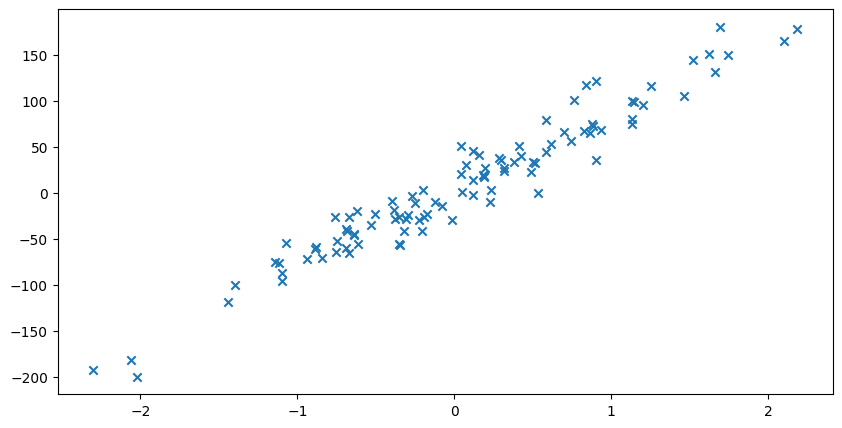

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(X_numpy, y_numpy, marker='x')

In [10]:
X_numpy.shape

(100, 1)

In [11]:
y_numpy.shape

(100,)

In [12]:
X = torch.from_numpy(X_numpy.astype(np.float32)).clone()
y = torch.from_numpy(y_numpy.astype(np.float32)).clone()

y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

# define the model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    # backward pass
    loss.backward()
    # update
    optimizer.step()

    # empty gradients
    optimizer.zero_grad()

    if (epoch+1)%10==0:
        print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

epoch: 10, loss=4399.3198
epoch: 20, loss=3280.3679
epoch: 30, loss=2471.2869
epoch: 40, loss=1885.6118
epoch: 50, loss=1461.2167
epoch: 60, loss=1153.3944
epoch: 70, loss=929.9274
epoch: 80, loss=767.5665
epoch: 90, loss=649.5140
epoch: 100, loss=563.6188


In [28]:
predicted = model(X).detach().clone().numpy()

In [29]:
predicted = predicted.reshape(100,)

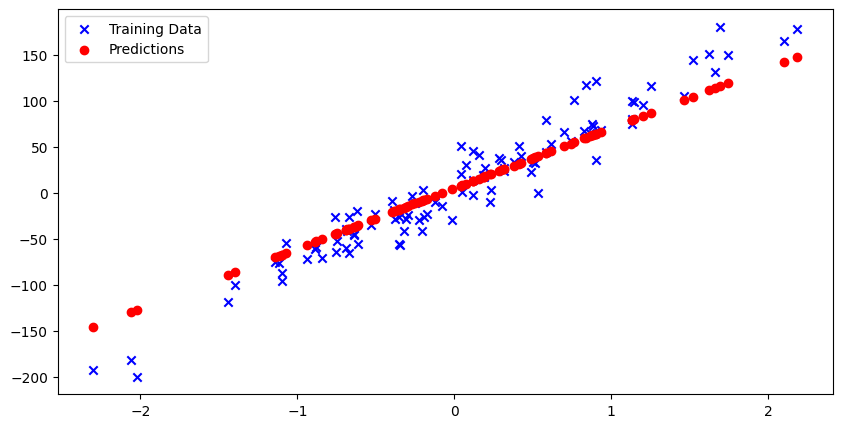

In [39]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(X_numpy, y_numpy,marker='x',color='blue',label='Training Data')
ax.scatter(X_numpy, predicted, marker='o', color='red',label='Predictions')
ax.legend()

**Logistic Regression:**

In [40]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
#) prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [42]:
n_samples, n_features = X.shape
print(n_samples, n_features)

569 30


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [44]:
# scale the features
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
X_train = torch.from_numpy(X_train.astype(np.float32)).clone()
X_test = torch.from_numpy(X_test.astype(np.float32)).clone()
y_train = torch.from_numpy(y_train.astype(np.float32)).clone()
y_test = torch.from_numpy(y_test.astype(np.float32)).clone()

In [46]:
# reshape our tensors: 
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

In [107]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        nn.init.xavier_uniform_(self.linear.weight)
        nn.init.zeros_(self.linear.bias)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        y_predicted = self.sigmoid(self.linear(x))
        return y_predicted

In [108]:
model = LogisticRegression(n_features)

In [109]:
# loss and optimizer:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)

In [110]:
num_epochs = 400

for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    
    # backward pass
    loss.backward()

    # updates
    optimizer.step()

    # evaluate the model during training:
    with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = criterion(y_test_pred, y_test)
        # compute the training accuracy:
        training_accuracy = ((y_pred > 0.5) == (y_train > 0.5)).sum().item()/(y_train.shape[0])
        test_accuracy = ((y_test_pred > 0.5) == (y_test > 0.5)).sum().item()/(y_test.shape[0])
        if (epoch+1)%10==0:
            print(f'epoch: {epoch+1}, training_loss = {loss.item():.4f}, test_loss = {test_loss.item():.4f}, train_acc : {training_accuracy:.4f}, test_acc: {test_accuracy:.4f}')

    # zero gradients
    optimizer.zero_grad()

epoch: 10, training_loss = 0.6973, test_loss = 0.6295, train_acc : 0.5934, test_acc: 0.6491
epoch: 20, training_loss = 0.5738, test_loss = 0.5222, train_acc : 0.6989, test_acc: 0.7193
epoch: 30, training_loss = 0.4745, test_loss = 0.4420, train_acc : 0.7802, test_acc: 0.7719
epoch: 40, training_loss = 0.4052, test_loss = 0.3892, train_acc : 0.8418, test_acc: 0.8070
epoch: 50, training_loss = 0.3576, test_loss = 0.3536, train_acc : 0.8725, test_acc: 0.8596
epoch: 60, training_loss = 0.3236, test_loss = 0.3281, train_acc : 0.8945, test_acc: 0.8772
epoch: 70, training_loss = 0.2983, test_loss = 0.3089, train_acc : 0.9077, test_acc: 0.8772
epoch: 80, training_loss = 0.2785, test_loss = 0.2940, train_acc : 0.9209, test_acc: 0.8772
epoch: 90, training_loss = 0.2626, test_loss = 0.2818, train_acc : 0.9253, test_acc: 0.8860
epoch: 100, training_loss = 0.2493, test_loss = 0.2717, train_acc : 0.9297, test_acc: 0.8772
epoch: 110, training_loss = 0.2381, test_loss = 0.2631, train_acc : 0.9297, tes

In [79]:
z = nn.Linear(3,1)

In [81]:
z.weight

Parameter containing:
tensor([[ 0.0778, -0.1334, -0.4630]], requires_grad=True)

In [82]:
z.bias

Parameter containing:
tensor([-0.1429], requires_grad=True)